In [38]:
import matplotlib.pyplot as plt

def print_graph(predicted, x_train, y_train):


    predictions = []
    for prediction in predicted:
            predictions.append(prediction.argmax())

    labels = []
    for y in y_train:
            labels.append(y.argmax())

    column_a = []
    for x in x_train:
        column_a.append(x[1])

    plt.plot(column_a, labels, 'go', label='True data', alpha=0.2)
    plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)
    plt.legend(loc='best')
    plt.show()

### Set up dataset

In [39]:
import numpy

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    numpy.random.seed (1)
    p = numpy.random.permutation(len(a))
    return a[p], b[p]

In [40]:
import torch
from helper_libs.shared.models.LogisticRegression import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import random

iris = load_iris()


encoder = OneHotEncoder(sparse=False)
x_train = iris.data
y_train =encoder.fit_transform(iris.target.reshape(-1, 1))
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = x_train.float()
y_train = y_train.float()

x_train, y_train = unison_shuffled_copies(x_train, y_train)


#TODO: Properly Federate Data
data_federation = [[x_train[0:64], y_train[0:64]], [x_train[65:129], y_train[65:129]]]

x_test = x_train[130:149]
y_test = y_train[130:149]

in_layer = len(x_train[0])
out_layer = len(y_train[0])
optimizer = "SGD"
criterion = "MSELoss"
starting_model = LogisticRegression(in_layer, out_layer)
learn_rate = 0.1

### Starting Model Predictions

/tmp/ipykernel_3073/514534770.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)


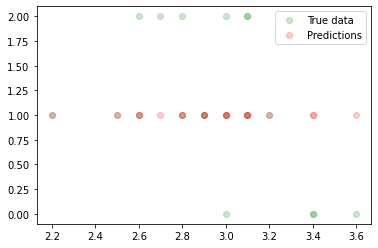

In [41]:
predicted = starting_model(x_test)

print_graph(predicted, x_test, y_test)

### Single Trained Model Predictions

/tmp/ipykernel_3073/514534770.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)


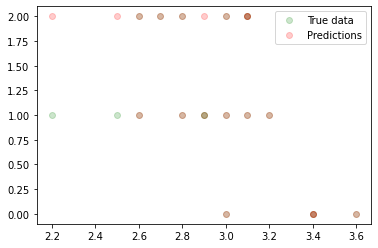

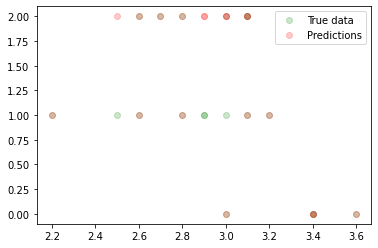

In [42]:
from sail_safe_functions.machine_learning.ModelTrain import ModelTrain

trained_models = []
avg_model = starting_model
epochs = 1000

# Train a model with every member of our data federation
for j in range(len(data_federation)):
    trained_models.append(ModelTrain.run(epochs, data_federation[j], learn_rate, avg_model, criterion, optimizer))
avg_model

for model in trained_models:
    predicted = model(x_test)
    print_graph(predicted, x_test, y_test)

### After Federal Averaging 

/tmp/ipykernel_3073/514534770.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)


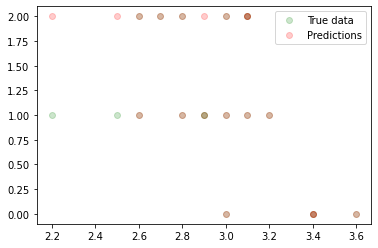

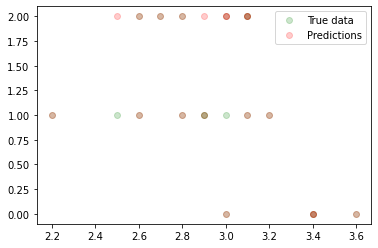

In [43]:
from sail_safe_functions.machine_learning.ModelAverage import ModelAverage

avg_model = starting_model
federal_epochs = 1
epochs = 1000

# Train a model with every member of our data federation
for epoch in range(federal_epochs):
    trained_models = []
    for j in range(len(data_federation)):
        trained_models.append(ModelTrain.run(epochs, data_federation[j], learn_rate, avg_model, criterion, optimizer))
    avg_model = ModelAverage.run(trained_models)

for model in trained_models:
    predicted = model(x_test)
    print_graph(predicted, x_test, y_test)

### Retrieving Model from Parameters

/tmp/ipykernel_3073/514534770.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', label='Predictions', color="red", alpha=0.2)


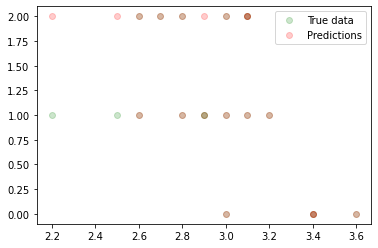

In [44]:
from sail_safe_functions.machine_learning.ModelRetrieve import ModelRetrieve

#Retrieve Averaged Model
avg_model = ModelRetrieve.run(avg_model)

predicted = avg_model(x_test)
print_graph(predicted, x_test, y_test)